# import packages and files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [ ]:
train=pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA502\Machine Learning\project\MLProject_train.csv')

In [ ]:
valid=pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA502\Machine Learning\project\MLProject_valid.csv')

In [ ]:
df=pd.concat([train, valid])

In [12]:
test=pd.read_csv(r'C:\Users\Lu\Downloads\MLProject_test.csv')

In [147]:
sum(test.isnull().sum()), #only the two targets are missing
sum(valid.isnull().sum())

0

In [46]:
valid.info() #all variables are either float or int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 152 entries, A1 to Z_5
dtypes: float64(133), int64(14), uint8(5)
memory usage: 67.6 MB


In [12]:
train.dtypes[train.dtypes=='object'] #no objects

Series([], dtype: object)

In [105]:
train.shape

(482697, 152)

## dummy code z2

In [13]:
z=pd.get_dummies(train['Z2'], prefix='Z')

In [14]:
train=train.join(z)

In [15]:
del train['Z2']

## validation data

In [16]:
z=pd.get_dummies(valid['Z2'], prefix='Z')
valid=valid.join(z)
del valid['Z2']

In [12]:
valid.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,V6,W6,X6,target1,target2,Z_1,Z_2,Z_3,Z_4,Z_5
0,11759,7.3100,15.93,17.27,0.922409,0.033946,0.024527,-0.015488,98.019802,-24.803338,...,0.1882,0.1868,0.094,1,0,0,0,0,1,0
1,340972,7.3000,15.93,17.27,0.922409,0.032532,0.020979,-0.015960,96.428571,-22.863123,...,0.1882,0.1868,0.094,1,0,0,0,0,1,0
2,124449,7.2890,16.18,17.58,0.920364,0.026620,0.020868,-0.015000,79.464286,-32.661392,...,0.1882,0.1868,0.094,1,1,0,0,0,1,0
3,115759,7.2599,16.17,17.56,0.920843,0.018933,0.018233,-0.018932,-67.857143,38.424656,...,0.1882,0.1868,0.094,1,1,0,0,0,1,0
4,127702,7.2800,16.18,17.57,0.920888,0.019608,0.015342,-0.013644,-75.784753,36.119851,...,0.1882,0.1868,0.094,1,1,0,0,0,1,0


In [17]:
#test
z=pd.get_dummies(test['Z2'], prefix='Z')
test=test.join(z)
del test['Z2']

In [42]:
test.shape

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,V6,W6,X6,target1,target2,Z_1,Z_2,Z_3,Z_4,Z_5
0,11759.0,7.3100,15.93,17.27,0.922409,0.033946,0.024527,-0.015488,98.019802,-24.803338,...,0.1882,0.1868,0.094,1.0,0.0,0,0,0,1,0
1,340972.0,7.3000,15.93,17.27,0.922409,0.032532,0.020979,-0.015960,96.428571,-22.863123,...,0.1882,0.1868,0.094,1.0,0.0,0,0,0,1,0
2,124449.0,7.2890,16.18,17.58,0.920364,0.026620,0.020868,-0.015000,79.464286,-32.661392,...,0.1882,0.1868,0.094,1.0,1.0,0,0,0,1,0
3,115759.0,7.2599,16.17,17.56,0.920843,0.018933,0.018233,-0.018932,-67.857143,38.424656,...,0.1882,0.1868,0.094,1.0,1.0,0,0,0,1,0
4,127702.0,7.2800,16.18,17.57,0.920888,0.019608,0.015342,-0.013644,-75.784753,36.119851,...,0.1882,0.1868,0.094,1.0,1.0,0,0,0,1,0


In [13]:
train.loc[:,('target1','target2')]

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


# EDA

## checking for outliers (for scaler selection)

In [9]:

from scipy.stats import zscore

In [10]:

train_zscores=train.apply(zscore) #zscore on each column

In [22]:
sum(abs(train_zscores).max()>3) #so 83 variables have potential outliers."" RobustScaler"

83

In [26]:
max_1=pd.DataFrame(train_zscores.max())

In [33]:
max_1[abs(max_1.iloc[:, 0])>3] #those are the variables

,0
A1,35.374666
B1,5.003706
C1,9.929467
D1,284.352291
E1,9.076999
...,...
K6,3.705144
P6,4.615266
Q6,3.803054
R6,6.871571


# Prep the data

## dropping missing values

In [18]:
train.shape

(483087, 154)

In [21]:
483087-482697

390

In [19]:
#dropping missing values

train=train.dropna()

In [20]:
train.shape

(482697, 154)

## save targets to labels

In [22]:
# Labels are the values we want to predict
labels = train.loc[:,'target1': 'target2']



In [11]:
labels

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


In [108]:
sum(labels['target1'])/len(labels['target1']) # not a rare event but might want to balance the data in models...

0.15619960793811466

## Remove target from train

In [24]:
#remove target variable from the dataset

train= train.drop(['target1', 'target2'], axis = 1)

train.shape

(482697, 152)

In [25]:
test.columns

Index(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1',
       ...
       'T6', 'U6', 'V6', 'W6', 'X6', 'Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5'],
      dtype='object', length=152)

In [26]:
# Saving column names for later use
train_list = list(train.columns)
# Convert to numpy array
train_list_array = np.array(train_list)

In [80]:
# Saving column names for later use
valid_list = list(valid.columns)
# Convert to numpy array
valid_list_array = np.array(valid_list)

In [81]:
len(valid_list)

152

In [28]:
# Saving column names for later use
test_list = list(test.columns)
# Convert to numpy array
test_list_array = np.array(test_list)

## Remove target from valid

In [29]:
labels_valid=valid.loc[:,'target1': 'target2']

In [30]:
valid= valid.drop(['target1', 'target2'], axis = 1)
valid.shape

(60000, 152)

In [31]:
target1=labels.iloc[:,0]
target2=labels.iloc[:,1]
valid_target1=labels_valid.iloc[:,0]
valid_target2=labels_valid.iloc[:,1]

# Data Cleaning/Prep

In [14]:
train.shape

(482697, 148)

In [24]:
483087-482697 #match

390

## Feature scaling

In [76]:
from sklearn.preprocessing import  RobustScaler


In [77]:
scaler =  RobustScaler() #scale to ensure models are properly trained. 
scaled_train = scaler.fit_transform(train) #mean=1,sd=1
scaled_valid = scaler.fit_transform(valid)
  #put back column names


In [88]:
scaled_test=scaler.fit_transform(test)
scaled_test=pd.DataFrame(scaled_test) #from array to dataframe
scaled_test.columns=train_list  #put back column names


In [78]:
scaled_train=pd.DataFrame(scaled_train) #from array to dataframe
scaled_train.columns=train_list  #put back column names


In [82]:
scaled_valid=pd.DataFrame(scaled_valid) #from array to dataframe
scaled_valid.columns=valid_list

In [83]:
scaled_train.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,T6,U6,V6,W6,X6,Z_1,Z_2,Z_3,Z_4,Z_5
0,0.341847,-0.672392,-0.242574,-0.311429,-0.032197,1.143799,0.149105,-0.453127,-0.383482,0.145799,...,0.370909,-0.486979,-0.743094,-0.633609,0.174107,1.0,0.0,0.0,0.0,0.0
1,1.342706,-0.504132,0.163366,0.017143,0.384614,0.830537,-1.579693,-1.344336,1.008064,-0.632131,...,0.747273,0.580729,0.513812,0.559229,0.678571,0.0,1.0,0.0,0.0,0.0
2,-0.526862,-0.754002,0.138614,0.014286,0.325048,-0.243961,0.014936,0.438117,-0.312467,0.187255,...,0.727273,-0.208333,-0.060773,-0.143251,0.542411,0.0,0.0,1.0,0.0,0.0
3,-0.266560,-0.524271,0.579208,0.754286,0.004139,-0.434602,0.684249,-0.555044,0.892334,-0.705060,...,0.156364,0.333333,0.337017,0.338843,0.089286,1.0,0.0,0.0,0.0,0.0
4,-0.503748,-0.755535,0.074257,-0.100000,0.394178,-0.376840,-0.883188,0.380751,0.984271,-0.804356,...,-0.220000,-0.429687,0.093923,-0.184573,-0.390625,0.0,0.0,0.0,1.0,0.0


In [37]:
scaled_valid.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,T6,U6,V6,W6,X6,Z_1,Z_2,Z_3,Z_4,Z_5
0,-0.521765,-1.918624,0.453668,0.533923,0.311420,3.446070,1.066087,-0.047210,1.028073,-0.558668,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
1,3.619110,-1.919290,0.453668,0.533923,0.311420,3.303102,0.922114,-0.051885,1.011383,-0.539528,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
2,0.895661,-1.920024,0.501931,0.625369,0.293510,2.705516,0.917623,-0.042376,0.833455,-0.636188,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
3,0.786358,-1.921965,0.500000,0.619469,0.297704,1.928589,0.810686,-0.081314,-0.711714,0.065074,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
4,0.936578,-1.920624,0.501931,0.622419,0.298099,1.996767,0.693356,-0.028947,-0.794862,0.042337,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0


# Establish a baseline model

In [19]:
# The baseline model is the logistic regression
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression(solver='lbfgs')


In [37]:
scaled_train.shape,len(labels.iloc[:,0])

((482697, 148), 482697)

## LR-Target1

In [22]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weight=compute_sample_weight(class_weight='balanced',y=labels.iloc[:,0])

In [30]:
from sklearn.metrics import precision_score

# log_reg.fit(scaled_train, labels.iloc[:,0], sample_weight=sample_weight) #use target1
# logreg_predictions1 = log_reg.predict(scaled_valid)
# log_preci_tar1 = precision_score(labels_valid.iloc[:,0], logreg_predictions1)
# log_preci_tar1  #baseline precision on target1


In [42]:
#roc?
from sklearn.metrics import roc_auc_score
roc_auc_score(labels_valid.iloc[:,0], logreg_predictions1)

0.5012847250841059

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_valid.iloc[:,0], logreg_predictions1)

array([[22685, 22628],
       [ 7315,  7372]], dtype=int64)

###  Do not balance the target 

In [43]:
log_reg.fit(scaled_train, labels.iloc[:,0]) #use target1
logreg_predictions1_s = log_reg.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], logreg_predictions1_s)


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.24383333333333335

## LR-target2


In [39]:
log_reg.fit(scaled_train, labels.iloc[:,1], sample_weight=compute_sample_weight(class_weight='balanced',y=labels.iloc[:,0])) #use target1
logreg_predictions2 = log_reg.predict(scaled_valid)
log_preci_tar2 = precision_score(labels_valid.iloc[:,1], logreg_predictions2)
log_preci_tar2

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.2594666666666667

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree_reg1 = DecisionTreeClassifier(max_depth=3)
tree_reg1.fit(scaled_train, labels.iloc[:,0], sample_weight=sample_weight)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
treepredic1= tree_reg1.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], treepredic1)

0.44101085015794533

In [78]:
tree_2 = DecisionTreeClassifier(max_depth=6)
tree_2.fit(scaled_train, labels.iloc[:,0], sample_weight=sample_weight)
treepredic2= tree_2.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], treepredic2) #slightly better than max_depth=3

0.4429860919222621

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
knn = KNeighborsClassifier(n_neighbors=2)


# fit the model with data
kn_model=knn.fit(scaled_train, target1)

# predict the response for new observations
kn_model_predict=knn.predict(scaled_valid, target1)

TypeError: predict() takes 2 positional arguments but 3 were given

# XGboost 
https://xgboost.readthedocs.io/en/latest/tutorials/index.html

In [33]:
#conda install -c anaconda py-xgboost
import xgboost as xgb

## target 1:plot log_loss on the base model 

In [57]:
model1 = xgb.XGBClassifier()
eval_set = [(scaled_train,target1), (scaled_valid, valid_target1)]
train_model3=model1.fit(scaled_train, target1,sample_weight=sample_weight, early_stopping_rounds=5, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
results =model1.evals_result()  #retrieve model details for plots

[0]	validation_0-error:0.298777	validation_0-logloss:0.668828	validation_1-error:0.287733	validation_1-logloss:0.669265
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 5 rounds.
[1]	validation_0-error:0.310634	validation_0-logloss:0.648402	validation_1-error:0.290483	validation_1-logloss:0.649488
[2]	validation_0-error:0.299469	validation_0-logloss:0.632873	validation_1-error:0.285983	validation_1-logloss:0.634762
[3]	validation_0-error:0.291446	validation_0-logloss:0.618749	validation_1-error:0.2783	validation_1-logloss:0.618822
[4]	validation_0-error:0.28418	validation_0-logloss:0.60613	validation_1-error:0.278	validation_1-logloss:0.604596
[5]	validation_0-error:0.281686	validation_0-logloss:0.59629	validation_1-error:0.27415	validation_1-logloss:0.595676
[6]	validation_0-error:0.28341	validation_0-logloss:0.587146	validation_1-error:0.274067	validation_1-logloss:0.588169
[7]	va

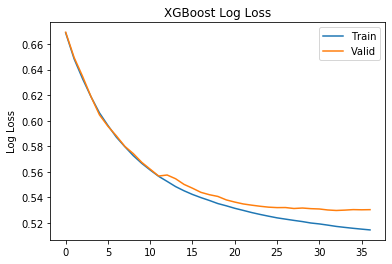

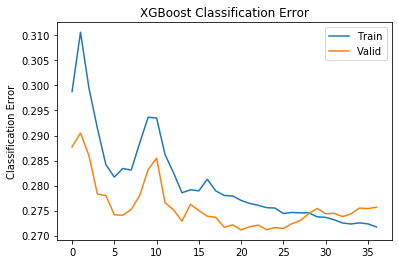

In [59]:
# retrieve performance metrics

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Valid')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Valid')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()



# it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 25.
# a similar story for classification error, where error appears to go back up at around epoch 25.

In [60]:
#precision
m1_predict=model1.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], m1_predict) #huge improvement 

0.460793150067598

In [61]:
#confusion matrix
confusion_matrix(valid_target1, m1_predict)

array([[33348, 11965],
       [ 4462, 10225]], dtype=int64)

## param tuning

In [64]:

model2 = xgb.XGBClassifier(
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.5,
                      objective='binary:logistic', 
                      n_estimators=30, #get the number from above train_model3
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10) #the larger the gamma the more conservative the model is

In [66]:
m2=model2.fit(scaled_train, target1,sample_weight=sample_weight, early_stopping_rounds=5, eval_metric=["error", "logloss"], 
              eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.314966	validation_0-logloss:0.689892	validation_1-error:0.305833	validation_1-logloss:0.690582
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 5 rounds.
[1]	validation_0-error:0.294236	validation_0-logloss:0.6883	validation_1-error:0.287083	validation_1-logloss:0.687972
[2]	validation_0-error:0.289606	validation_0-logloss:0.685749	validation_1-error:0.292267	validation_1-logloss:0.685403
[3]	validation_0-error:0.29018	validation_0-logloss:0.682837	validation_1-error:0.299117	validation_1-logloss:0.683198
[4]	validation_0-error:0.285525	validation_0-logloss:0.680678	validation_1-error:0.292667	validation_1-logloss:0.680717
[5]	validation_0-error:0.287128	validation_0-logloss:0.678599	validation_1-error:0.293833	validation_1-logloss:0.678593
[6]	validation_0-error:0.287161	validation_0-logloss:0.675899	validation_1-error:0.293067	validation_1-logloss:0.676018

In [67]:
#precision
m2_predict=model2.predict(scaled_valid)
precision_score(valid_target1, m2_predict) #Not as good as m1

0.4446193537102628

### GridSearch

In [39]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [35]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [ 4, 5,6]
        }

xgb_gs = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)


In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb_gs, param_distributions=params, n_iter=param_comb, scoring='precision', n_jobs=4, cv=skf.split(scaled_train, target1), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(scaled_train, target1)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


## Cross validation

In [ ]:
#scale the original dataset
scaler =  RobustScaler() #scale to ensure models are properly trained. 
scaled_train = scaler.fit_transform(train)

In [13]:
# data_dmatrix = xgb.DMatrix(data=train,label=target1) #on non-scaled data
# params = {"objective":'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 6, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [32]:
cv_results['test-auc-mean'].mean()

0.8620574466666665

In [27]:
model_ns = xgb.XGBClassifier()
eval_set_ns = [(train,target1), (valid, valid_target1)]
model_ns.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)


[0]	validation_0-error:0.155464	validation_1-error:0.289767
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.152709	validation_1-error:0.278033
[2]	validation_0-error:0.147306	validation_1-error:0.22395
[3]	validation_0-error:0.147306	validation_1-error:0.22395
[4]	validation_0-error:0.147306	validation_1-error:0.22395
[5]	validation_0-error:0.147306	validation_1-error:0.22395
[6]	validation_0-error:0.147275	validation_1-error:0.223533
[7]	validation_0-error:0.147043	validation_1-error:0.223533
[8]	validation_0-error:0.147043	validation_1-error:0.223533
[9]	validation_0-error:0.146995	validation_1-error:0.223333
[10]	validation_0-error:0.147241	validation_1-error:0.2232
[11]	validation_0-error:0.147165	validation_1-error:0.2232
[12]	validation_0-error:0.147154	validation_1-error:0.222633
[13]	validation_0-error:0.146997	validation_1-error:0.223083
[14]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
from sklearn.metrics import precision_score
xgb_predict= model_ns.predict(valid)
precision_score(valid_target1, xgb_predict) #Best so far


0.5676335877862595

### Another attempt at param-tuning

In [23]:
model_2 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
eval_set_ns = [(train,target1), (valid, valid_target1)]
%time model_2.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)


[0]	validation_0-error:0.15027	validation_1-error:0.231333
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.15009	validation_1-error:0.236583
[2]	validation_0-error:0.148571	validation_1-error:0.234317
[3]	validation_0-error:0.148499	validation_1-error:0.231267
[4]	validation_0-error:0.148509	validation_1-error:0.231483
[5]	validation_0-error:0.148795	validation_1-error:0.231783
[6]	validation_0-error:0.14754	validation_1-error:0.228083
[7]	validation_0-error:0.147173	validation_1-error:0.227967
[8]	validation_0-error:0.147159	validation_1-error:0.2304
[9]	validation_0-error:0.147836	validation_1-error:0.2312
[10]	validation_0-error:0.147734	validation_1-error:0.23145
[11]	validation_0-error:0.148176	validation_1-error:0.232067
[12]	validation_0-error:0.147101	validation_1-error:0.22865
Stopping. Best iteration:
[7]	validation_0-error:0.147173	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [24]:
from sklearn.metrics import precision_score
xgb_predict= model_2.predict(valid)
precision_score(valid_target1, xgb_predict) #Best so far


0.580244949896612

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(valid_target1, xgb_predict)

0.595071783157591

### Attempts three

In [27]:
model_3 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=10)
eval_set_ns = [(train,target1), (valid, valid_target1)]


[0]	validation_0-error:0.15027	validation_1-error:0.231333
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.15009	validation_1-error:0.236583
[2]	validation_0-error:0.148571	validation_1-error:0.234317
[3]	validation_0-error:0.148499	validation_1-error:0.231267
[4]	validation_0-error:0.148509	validation_1-error:0.231483
[5]	validation_0-error:0.148795	validation_1-error:0.231783
[6]	validation_0-error:0.14754	validation_1-error:0.228083
[7]	validation_0-error:0.147173	validation_1-error:0.227967
[8]	validation_0-error:0.147159	validation_1-error:0.2304
[9]	validation_0-error:0.147836	validation_1-error:0.2312
[10]	validation_0-error:0.147734	validation_1-error:0.23145
[11]	validation_0-error:0.148176	validation_1-error:0.232067
[12]	validation_0-error:0.147101	validation_1-error:0.22865
Stopping. Best iteration:
[7]	validation_0-error:0.147173	validati

XGBoostError: need to call fit or load_model beforehand

In [28]:
%time model_3.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)
xgb_predict= model_3.predict(valid)
precision_score(valid_target1, xgb_predict) 


[0]	validation_0-error:0.145097	validation_1-error:0.228267
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.144194	validation_1-error:0.228633
[2]	validation_0-error:0.145226	validation_1-error:0.22255
[3]	validation_0-error:0.145114	validation_1-error:0.223617
[4]	validation_0-error:0.145031	validation_1-error:0.221367
[5]	validation_0-error:0.144592	validation_1-error:0.221817
[6]	validation_0-error:0.144269	validation_1-error:0.22175
[7]	validation_0-error:0.144026	validation_1-error:0.221633
[8]	validation_0-error:0.143883	validation_1-error:0.2223
[9]	validation_0-error:0.143732	validation_1-error:0.22225
Stopping. Best iteration:
[4]	validation_0-error:0.145031	validation_1-error:0.221367

Wall time: 2min 30s


0.5752544188537762

In [29]:
roc_auc_score(valid_target1, xgb_predict)

0.6390634927529958

### model_4 (this one)

In [34]:
from sklearn.metrics import precision_score
model_4 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10)
eval_set_ns = [(train,target1), (valid, valid_target1)]


%time model_4.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)
xgb_predict= model_4.predict(valid)
precision_score(valid_target1, xgb_predict) 

[0]	validation_0-error:0.143206	validation_1-error:0.2284
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.140873	validation_1-error:0.2377
[2]	validation_0-error:0.140324	validation_1-error:0.228267
[3]	validation_0-error:0.140138	validation_1-error:0.230033
[4]	validation_0-error:0.13979	validation_1-error:0.23255
[5]	validation_0-error:0.138942	validation_1-error:0.2348
[6]	validation_0-error:0.139056	validation_1-error:0.23025
[7]	validation_0-error:0.138847	validation_1-error:0.227467
[8]	validation_0-error:0.138677	validation_1-error:0.228167
[9]	validation_0-error:0.13823	validation_1-error:0.224217
[10]	validation_0-error:0.138232	validation_1-error:0.224167
[11]	validation_0-error:0.138186	validation_1-error:0.224267
[12]	validation_0-error:0.138093	validation_1-error:0.22515
[13]	validation_0-error:0.13802	validation_1-error:0.228083
[14]	val

0.59199762011007

In [33]:
roc_auc_score(valid_target1, xgb_predict)

0.6052267220395299

In [102]:
#on target 2
model_4_2 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                             seed=42)
eval_set_ns = [(train,target2), (valid, valid_target2)]
%time model_4_2.fit(train,target2, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)
xgb_predict= model_4_2.predict(valid)
precision_score(valid_target2, xgb_predict) 

[0]	validation_0-error:0.168899	validation_1-error:0.247417
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.162502	validation_1-error:0.244083
[2]	validation_0-error:0.163564	validation_1-error:0.243833
[3]	validation_0-error:0.162238	validation_1-error:0.238367
[4]	validation_0-error:0.162323	validation_1-error:0.239917
[5]	validation_0-error:0.161055	validation_1-error:0.252617
[6]	validation_0-error:0.160368	validation_1-error:0.252667
[7]	validation_0-error:0.160687	validation_1-error:0.255667
[8]	validation_0-error:0.159781	validation_1-error:0.259567
Stopping. Best iteration:
[3]	validation_0-error:0.162238	validation_1-error:0.238367

Wall time: 1min 52s


0.5845641310383121

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(valid_target2, xgb_predict)

0.6239761611642621

In [75]:
test['target1']=model_4.predict(test)

In [81]:
test['target1'].value_counts()

0    101892
1     13407
Name: target1, dtype: int64

In [83]:
model_4.predict_proba(test.iloc[:, :-2])

array([[0.6307746 , 0.3692254 ],
       [0.622018  , 0.37798205],
       [0.622018  , 0.37798205],
       ...,
       [0.7887211 , 0.21127892],
       [0.7848068 , 0.21519323],
       [0.7887211 , 0.21127892]], dtype=float32)

In [128]:
del valid['pred1']

#### On scaled data

In [84]:
model_sc4 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10)
eval_set_ns = [(scaled_train,target1), (scaled_valid, valid_target1)]


%time model_sc4.fit(scaled_train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)
xgb_predict= model_sc4.predict(scaled_valid)
precision_score(valid_target1, xgb_predict) 

[0]	validation_0-error:0.143206	validation_1-error:0.238033
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.140873	validation_1-error:0.235133
[2]	validation_0-error:0.140324	validation_1-error:0.231617
[3]	validation_0-error:0.140138	validation_1-error:0.2299
[4]	validation_0-error:0.13979	validation_1-error:0.228167
[5]	validation_0-error:0.138942	validation_1-error:0.228983
[6]	validation_0-error:0.139017	validation_1-error:0.228
[7]	validation_0-error:0.138843	validation_1-error:0.226333
[8]	validation_0-error:0.138677	validation_1-error:0.227
[9]	validation_0-error:0.13823	validation_1-error:0.225467
[10]	validation_0-error:0.138232	validation_1-error:0.225917
[11]	validation_0-error:0.138188	validation_1-error:0.225617
[12]	validation_0-error:0.138035	validation_1-error:0.225883
[13]	validation_0-error:0.13795	validation_1-error:0.225967
[14]	va

0.7148683722654802

In [86]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
pred_proba_df = pd.DataFrame(model_sc4.predict_proba(scaled_valid))
threshold_list = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_auc_score = metrics.roc_auc_score(valid_target1,
                                           Y_test_pred.iloc[:,1])
    test_precision_score = metrics.precision_score(valid_target1,
                                           Y_test_pred.iloc[:,1])
    print(i)
    print('Our testing auc is {}'.format(test_auc_score))
    print('Our testing precision is {}'.format(test_precision_score))

    cm=(confusion_matrix(valid_target1,
                           Y_test_pred.iloc[:,1]))
    print(cm)
    specificity=cm[0][0]/(cm[0][0]+cm[0][1])
    sensitivity=cm[1][1]/(cm[1][0]+cm[1][1])
    print( specificity+sensitivity-1)



******** For i = 0.3 ******
0.3
Our testing auc is 0.6935570816149528
Our testing precision is 0.4579713023186535
[[34396 10917]
 [ 5463  9224]]
0.38711416322990555

******** For i = 0.35 ******
0.35
Our testing auc is 0.6775142131127002
Our testing precision is 0.49476290230432296
[[37354  7959]
 [ 6893  7794]]
0.35502842622540065

******** For i = 0.4 ******
0.4
Our testing auc is 0.6514335869309026
Our testing precision is 0.5502910149145144
[[40368  4945]
 [ 8636  6051]]
0.3028671738618052

******** For i = 0.45 ******
0.45
Our testing auc is 0.5979307322244337
Our testing precision is 0.6261190100052659
[[43183  2130]
 [11120  3567]]
0.19586146444886743

******** For i = 0.5 ******
0.5
Our testing auc is 0.5571508533705231
Our testing precision is 0.7148683722654802
[[44544   769]
 [12759  1928]]
0.11430170674104612

******** For i = 0.55 ******
0.55
Our testing auc is 0.5255620157225978
Our testing precision is 0.776735459662289
[[45075   238]
 [13859   828]]
0.05112403144519550

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.75
Our testing auc is 0.5
Our testing precision is 0.0
[[45313     0]
 [14687     0]]
0.0

******** For i = 0.8 ******
0.8
Our testing auc is 0.5
Our testing precision is 0.0
[[45313     0]
 [14687     0]]
0.0


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
model_sc4_2 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10)
eval_set_ns = [(scaled_train,target2), (scaled_valid, valid_target2)]


%time model_sc4_2.fit(scaled_train,target2, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)
xgb_predict= model_sc4_2.predict(scaled_valid)
precision_score(valid_target1, xgb_predict) 

[0]	validation_0-error:0.168955	validation_1-error:0.249583
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.16194	validation_1-error:0.24985
[2]	validation_0-error:0.16338	validation_1-error:0.242433
[3]	validation_0-error:0.162174	validation_1-error:0.236983
[4]	validation_0-error:0.161441	validation_1-error:0.233133
[5]	validation_0-error:0.161074	validation_1-error:0.23815
[6]	validation_0-error:0.16091	validation_1-error:0.2326
[7]	validation_0-error:0.159728	validation_1-error:0.232433
[8]	validation_0-error:0.159324	validation_1-error:0.231167
[9]	validation_0-error:0.158621	validation_1-error:0.231283
[10]	validation_0-error:0.158443	validation_1-error:0.229867
[11]	validation_0-error:0.158495	validation_1-error:0.227683
[12]	validation_0-error:0.158793	validation_1-error:0.227
[13]	validation_0-error:0.158306	validation_1-error:0.227433
[14]	v

0.5928013876843018

## Youden's Index and Confusion Matrix 

In [173]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
pred_proba_df = pd.DataFrame(model_4.predict_proba(valid))
threshold_list = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_auc_score = metrics.roc_auc_score(valid_target1,
                                           Y_test_pred.iloc[:,1])
    test_precision_score = metrics.precision_score(valid_target1,
                                           Y_test_pred.iloc[:,1])
    print(i)
    print('Our testing auc is {}'.format(test_auc_score))
    print('Our testing precision is {}'.format(test_precision_score))

    cm=(confusion_matrix(valid_target1,
                           Y_test_pred.iloc[:,1]))
    print(cm)
    specificity=cm[0][0]/(cm[0][0]+cm[0][1])
    sensitivity=cm[1][1]/(cm[1][0]+cm[1][1])
    print( specificity+sensitivity-1)



******** For i = 0.15 ******
/n
0.15
Our testing auc is 0.5
Our testing precision is 0.24478333333333332
[[    0 45313]
 [    0 14687]]
0.0

******** For i = 0.2 ******
/n
0.2
Our testing auc is 0.5669949609070253
Our testing precision is 0.2727272727272727
[[ 6633 38680]
 [  182 14505]]
0.13398992181405056

******** For i = 0.25 ******
/n
0.25
Our testing auc is 0.6944331897434923
Our testing precision is 0.3621252516459002
[[21866 23447]
 [ 1376 13311]]
0.3888663794869849

******** For i = 0.3 ******
/n
0.3
Our testing auc is 0.7209940964989107
Our testing precision is 0.4114208021753909
[[27997 17316]
 [ 2583 12104]]
0.4419881929978213

******** For i = 0.35 ******
/n
0.35
Our testing auc is 0.7039295237023295
Our testing precision is 0.4619557390427728
[[34105 11208]
 [ 5064  9623]]
0.40785904740465906

******** For i = 0.4 ******
/n
0.4
Our testing auc is 0.6725862330804355
Our testing precision is 0.5046494264576121
[[38015  7298]
 [ 7252  7435]]
0.34517246616087105

******** Fo

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


******** For i = 0.3 ******
Our testing auc is 0.7209940964989107
Our testing precision is 0.4114208021753909
[[27997 17316]
 [ 2583 12104]]
0.4419881929978213

### Target2

In [61]:
pred_proba_df 

,0,1
0,0.543308,0.456692
1,0.543308,0.456692
2,0.543308,0.456692
3,0.543308,0.456692
4,0.543308,0.456692
...,...,...
59995,0.463902,0.536098
59996,0.463902,0.536098
59997,0.463902,0.536098
59998,0.463902,0.536098


In [63]:
display(pred_proba_df.applymap(lambda x: 1 if x>0.15 else 0), Y_test_pred.iloc[:,1])

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
59995,1,1
59996,1,1
59997,1,1
59998,1,1


0        1
1        1
2        1
3        1
4        1
        ..
59995    1
59996    1
59997    1
59998    1
59999    1
Name: 1, Length: 60000, dtype: int64

In [60]:
pred_proba_df = pd.DataFrame(model_4_2.predict_proba(valid))
threshold_list = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_auc_score = metrics.roc_auc_score(valid_target2,
                                           Y_test_pred.iloc[:,1])
    test_precision_score = metrics.precision_score(valid_target2,
                                           Y_test_pred.iloc[:,1])
    
    print('Our testing auc is {}'.format(test_auc_score))
    print('Our testing precision is {}'.format(test_precision_score))

    cm=(confusion_matrix(valid_target2,
                           Y_test_pred.iloc[:,1]))
    print(cm)
    specificity=cm[0][0]/(cm[0][0]+cm[0][1])
    sensitivity=cm[1][1]/(cm[1][0]+cm[1][1])
    print( specificity+sensitivity-1)



******** For i = 0.15 ******


NameError: name 'metrics' is not defined

i=0.5
Our testing auc is 0.6239761611642621
Our testing precision is 0.5845641310383121
[[40434  3741]
 [10561  5264]]
0.24795232232852427

## Graph the youden's index

In [106]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.metrics import roc_curve, auc


# Add prediction to dataframe
valid['pred1'] = model_4.predict(valid)

fpr, tpr, thresholds =roc_curve(valid_target1, valid['pred1'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


Area under the ROC curve : 0.605227


In [110]:
roc_curve(valid_target1, valid['pred1'])

(array([0.       , 0.0605345, 1.       ]),
 array([0.        , 0.27098795, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [116]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 
threshold = Find_Optimal_Cutoff(valid_target1, xgb_predict)
print (threshold)

[1]


[]

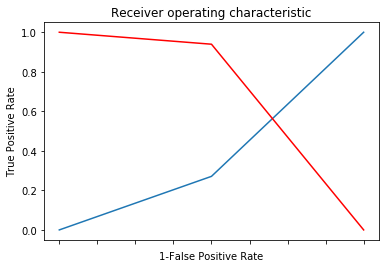

In [108]:
####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 
                    'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [109]:
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,2
1,0.060535,0.270988,0.939465,-0.668478,1
2,1.000000,1.000000,0.000000,1.000000,0


In [112]:
roc['tpr']-roc['1-fpr']-1

0   -2.000000
1   -1.668478
2    0.000000
dtype: float64

In [73]:
#predict it on test_target2
test['target2']=model_4_2.predict(test.iloc[:, :-1])


In [76]:
test.columns

Index(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1',
       ...
       'V6', 'W6', 'X6', 'Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'target2',
       'target1'],
      dtype='object', length=154)

In [77]:
test.to_pickle(r'prediction.pkl')

In [37]:
model_5 = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.8,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=300, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                           seed=42)
eval_set_ns = [(train,target1), (valid, valid_target1)]


%time model_5.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)
xgb_predict= model_5.predict(valid)
precision_score(valid_target1, xgb_predict) 

[0]	validation_0-error:0.142139	validation_1-error:0.247617
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.142062	validation_1-error:0.229617
[2]	validation_0-error:0.142332	validation_1-error:0.226983
[3]	validation_0-error:0.140927	validation_1-error:0.237683
[4]	validation_0-error:0.141447	validation_1-error:0.22695
[5]	validation_0-error:0.140397	validation_1-error:0.227683
[6]	validation_0-error:0.1406	validation_1-error:0.22665
[7]	validation_0-error:0.140728	validation_1-error:0.2347
[8]	validation_0-error:0.140212	validation_1-error:0.235
[9]	validation_0-error:0.140154	validation_1-error:0.236867
[10]	validation_0-error:0.139696	validation_1-error:0.236167
[11]	validation_0-error:0.139444	validation_1-error:0.237
Stopping. Best iteration:
[6]	validation_0-error:0.1406	validation_1-error:0.22665

Wall time: 1min 25s


0.5804257835600236

## CV

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model

kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(model_2, train, target1,  scoring='average_precision', cv=kfold) # on the entire dataset
print("average_precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

average_precision: 47.08% (0.34%)


In [39]:
results

array([0.46967187, 0.47531252, 0.46927901, 0.47123762, 0.46345634,
       0.46938757, 0.46976289, 0.47465939, 0.47481152, 0.46998205])

## replicate on scaled data

In [30]:
model_sc = xgb.XGBClassifier()
eval_set = [(scaled_train,target1), (scaled_valid, valid_target1)]
model_sc.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.355544	validation_1-error:0.320367
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.353106	validation_1-error:0.319317
[2]	validation_0-error:0.353106	validation_1-error:0.319317
[3]	validation_0-error:0.353106	validation_1-error:0.319317
[4]	validation_0-error:0.353106	validation_1-error:0.319317
[5]	validation_0-error:0.353106	validation_1-error:0.319317
[6]	validation_0-error:0.156297	validation_1-error:0.244783
[7]	validation_0-error:0.239158	validation_1-error:0.27025
[8]	validation_0-error:0.156297	validation_1-error:0.244783
[9]	validation_0-error:0.229939	validation_1-error:0.27025
[10]	validation_0-error:0.226689	validation_1-error:0.27025
[11]	validation_0-error:0.226689	validation_1-error:0.27025
Stopping. Best iteration:
[6]	validation_0-error:0.156297	validation_1-error:0.244783



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
sc_predict= model_sc.predict(valid)
precision_score(valid_target1, sc_predict) #pretty much the same

NameError: name 'model_sc' is not defined

In [18]:
#variaables with low variance

In [19]:
train.shape

(482697, 148)

In [23]:
#remove rows that are the same...
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X=selector.fit_transform(train)

In [24]:
len(X) #didn't change anything ...

482697

In [26]:
#set threshold to 95%
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(train)
X=train[train.columns[sel.get_support(indices=True)]] 

In [27]:
X.shape #reduced it to 113

(482697, 113)

# Predict

## Target 1

In [36]:
test_predict1= model_4.predict_proba(test)


In [42]:
test_predict1
pred_proba_1 = pd.DataFrame(test_predict1)

In [68]:
pred_proba_1.iloc[:,1].describe()

count    55000.000000
mean         0.330225
std          0.120241
min          0.168830
25%          0.227951
50%          0.304964
75%          0.409306
max          0.724929
Name: 1, dtype: float64

In [64]:
##use cut-offs to classify 0s and 1s.
#target 1
test_predict1_classy= pred_proba_1.applymap(lambda x: 1 if x>0.5 else 0)

In [67]:
test_predict1_classy.iloc[:,1].value_counts()

0    48568
1     6432
Name: 1, dtype: int64

## Target 2

In [39]:
test_predict2_prob=model_4_2.predict_proba(test)

In [45]:

pred_proba_2 = pd.DataFrame(test_predict2_prob)

In [58]:
pred_proba_2

,0,1
0,0.604897,0.395103
1,0.561527,0.438473
2,0.552453,0.447547
3,0.573439,0.426561
4,0.571605,0.428395
...,...,...
54995,0.532593,0.467407
54996,0.488407,0.511593
54997,0.531978,0.468022
54998,0.531497,0.468503


In [174]:
##or i=0.45
pred_proba_2 = pd.DataFrame(test_predict2)
# test_predict2_classy= pred_proba_2.applymap(lambda x: 1 if x>0.45 else 0)
# test_predict2_classy.iloc[:,0].value_counts() ####THE SAME!

0    46710
1     8290
Name: 0, dtype: int64

## Scaled targets

In [90]:
test_scaled_predict1= model_sc4.predict_proba(scaled_test)
pred_proba_scaled_1 = pd.DataFrame(test_scaled_predict1)
pred_proba_scaled_1.iloc[:,1]

0        0.257451
1        0.220755
2        0.195420
3        0.187344
4        0.193717
           ...   
54995    0.477039
54996    0.412559
54997    0.266558
54998    0.307196
54999    0.199381
Name: 1, Length: 55000, dtype: float32

In [93]:
pred_proba_scaled_1.applymap(lambda x: 1 if x>0.5 else 0).sum()

0    52338
1     2662
dtype: int64

In [95]:
test_scaled_predict2= model_sc4_2.predict_proba(scaled_test)
pred_proba_scaled_2 = pd.DataFrame(test_scaled_predict2)
pred_proba_scaled_2.iloc[:,1]

0        0.154729
1        0.204391
2        0.123202
3        0.104738
4        0.137556
           ...   
54995    0.522200
54996    0.491167
54997    0.248625
54998    0.228271
54999    0.152582
Name: 1, Length: 55000, dtype: float32

In [98]:
pred_proba_scaled_2.applymap(lambda x: 1 if x>0.5 else 0).sum()

0    51132
1     3868
dtype: int64

## EXPORT

In [96]:

dataset = pd.DataFrame({'target1': pred_proba_1.iloc[:,1], 'target2': pred_proba_2.iloc[:,1],
                       'scaled1':pred_proba_scaled_1.iloc[:,1], 'scaled2':pred_proba_scaled_2.iloc[:,1]})

In [97]:
dataset.head()

,target1,target2,scaled1,scaled2
0,0.327284,0.395103,0.257451,0.154729
1,0.239574,0.438473,0.220755,0.204391
2,0.246011,0.447547,0.195420,0.123202
3,0.204027,0.426561,0.187344,0.104738
4,0.230340,0.428395,0.193717,0.137556


In [100]:
test_classy= dataset.applymap(lambda x: 1 if x>0.5 else 0)

In [101]:
test_classy.apply(lambda x: x.sum()/len(x))

target1    0.116945
target2    0.150727
scaled1    0.048400
scaled2    0.070327
dtype: float64

In [74]:
test_classy.head()

,target1,target2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [75]:
dataset.to_pickle(r'test_prob.pkl')

# H2O


In [ ]:
import h2o
h2o.init()
h2o.demo("glm")

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator